In [2]:
import pandas as pd
# Load dataset
nyc = pd.read_csv('/content/dataset_TSMC2014_NYC.csv')
tky = pd.read_csv('/content/dataset_TSMC2014_TKY.csv')

nyc.info()
tky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227428 entries, 0 to 227427
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   userId           227428 non-null  int64  
 1   venueId          227428 non-null  object 
 2   venueCategoryId  227428 non-null  object 
 3   venueCategory    227428 non-null  object 
 4   latitude         227428 non-null  float64
 5   longitude        227428 non-null  float64
 6   timezoneOffset   227428 non-null  int64  
 7   utcTimestamp     227428 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 13.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8262 entries, 0 to 8261
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userId           8262 non-null   int64  
 1   venueId          8262 non-null   object 
 2   venueCategoryId  8262 non-null   object 
 3   venueCategory   

In [4]:
# 1. Menghapus baris dengan data yang hilang
nyc.dropna(inplace=True)
tky.dropna(inplace=True)
nyc.info()
tky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227428 entries, 0 to 227427
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   userId           227428 non-null  int64  
 1   venueId          227428 non-null  object 
 2   venueCategoryId  227428 non-null  object 
 3   venueCategory    227428 non-null  object 
 4   latitude         227428 non-null  float64
 5   longitude        227428 non-null  float64
 6   timezoneOffset   227428 non-null  int64  
 7   utcTimestamp     227428 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 13.9+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 8261 entries, 0 to 8260
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userId           8261 non-null   int64  
 1   venueId          8261 non-null   object 
 2   venueCategoryId  8261 non-null   object 
 3   venueCategory    8261

In [5]:
# 2. Definisikan kategori yang relevan
categories = {
    "Makanan dan Minuman": [
        "Restaurant", "Cafe", "Bakery", "Food Truck", "Fast Food Restaurant",
        "Pizza Place", "Burger Joint", "Ice Cream Shop", "Sushi Restaurant",
        "Bar", "Coffee Shop", "Cupcake Shop", "Dim Sum Restaurant", "Diner"
    ],
    "Belanja": [
        "Shopping Mall", "Clothing Store", "Bookstore", "Electronics Store",
        "Jewelry Store", "Toy / Game Store", "Department Store"
    ],
    "Transportasi": [
        "Bus Station", "Train Station", "Airport", "Taxi", "Light Rail",
        "Ferry", "Parking", "Travel & Transport"
    ],
    "Pendidikan": [
        "School", "University", "College", "Library", "Community College"
    ],
    "Kesehatan": [
        "Medical Center", "Gym / Fitness Center", "Spa / Massage",
        "Drugstore / Pharmacy", "Hospital", "Tanning Salon"
    ],
    "Hiburan dan Rekreasi": [
        "Theater", "Museum", "Zoo", "Park", "Concert Hall", "Arcade",
        "Amusement Park", "Beach", "Bowling Alley"
    ],
    "Perumahan dan Lingkungan": [
        "Home (private)", "Residential Building (Apartment / Condo)",
        "Neighborhood", "Housing Development"
    ]
}

# Fungsi untuk memetakan kategori
def map_category(venue_category):
    for category, subcategories in categories.items():
        if venue_category in subcategories:
            return category
    return "Lainnya"

In [7]:
# Fungsi untuk menampilkan kategori dan subkategori
def display_categories(categories):
    for category, subcategories in categories.items():
        print(f"Kategori: {category}")
        for subcategory in subcategories:
            print(f"  - {subcategory}")
        print()

# Memanggil fungsi untuk menampilkan hasil
display_categories(categories)



Kategori: Makanan dan Minuman
  - Restaurant
  - Cafe
  - Bakery
  - Food Truck
  - Fast Food Restaurant
  - Pizza Place
  - Burger Joint
  - Ice Cream Shop
  - Sushi Restaurant
  - Bar
  - Coffee Shop
  - Cupcake Shop
  - Dim Sum Restaurant
  - Diner

Kategori: Belanja
  - Shopping Mall
  - Clothing Store
  - Bookstore
  - Electronics Store
  - Jewelry Store
  - Toy / Game Store
  - Department Store

Kategori: Transportasi
  - Bus Station
  - Train Station
  - Airport
  - Taxi
  - Light Rail
  - Ferry
  - Parking
  - Travel & Transport

Kategori: Pendidikan
  - School
  - University
  - College
  - Library
  - Community College

Kategori: Kesehatan
  - Medical Center
  - Gym / Fitness Center
  - Spa / Massage
  - Drugstore / Pharmacy
  - Hospital
  - Tanning Salon

Kategori: Hiburan dan Rekreasi
  - Theater
  - Museum
  - Zoo
  - Park
  - Concert Hall
  - Arcade
  - Amusement Park
  - Beach
  - Bowling Alley

Kategori: Perumahan dan Lingkungan
  - Home (private)
  - Residential Buildi

In [10]:
#kategori relevan pada dataset
nyc['Kategori'] = nyc['venueCategory'].apply(map_category)
tky['Kategori'] = tky['venueCategory'].apply(map_category)
# Filtered dataset berdasarkan kategori yang relevan
nyc_filtered = nyc[nyc['venueCategory'].isin(relevant_categories)]
tky_filtered = tky[tky['venueCategory'].isin(relevant_categories)]
# Output untuk dataset NYC
print("Output untuk Dataset NYC:")
print(nyc_filtered[['venueCategory', 'Kategori']].head())  # Menampilkan beberapa baris pertama
print("\nJumlah venue di setiap kategori untuk NYC:")
print(nyc_filtered.groupby('Kategori').size())  # Menampilkan jumlah venue di setiap kategori
print("\nJumlah total venue yang difilter untuk NYC:", len(nyc_filtered))
# Output untuk dataset TKY
print("\nOutput untuk Dataset TKY:")
print(tky_filtered[['venueCategory', 'Kategori']].head())  # Menampilkan beberapa baris pertama
print("\nJumlah venue di setiap kategori untuk TKY:")
print(tky_filtered.groupby('Kategori').size())  # Menampilkan jumlah venue di setiap kategori
print("\nJumlah total venue yang difilter untuk TKY:", len(tky_filtered))

Output untuk Dataset NYC:
    venueCategory                  Kategori
2  Home (private)  Perumahan dan Lingkungan
3  Medical Center                 Kesehatan
4      Food Truck       Makanan dan Minuman
6     Coffee Shop       Makanan dan Minuman
7     Bus Station              Transportasi

Jumlah venue di setiap kategori untuk NYC:
Kategori
Belanja                      7178
Hiburan dan Rekreasi         7596
Kesehatan                   15613
Makanan dan Minuman         35606
Pendidikan                   2972
Perumahan dan Lingkungan    24421
Transportasi                16129
dtype: int64

Jumlah total venue yang difilter untuk NYC: 109515

Output untuk Dataset TKY:
          venueCategory                  Kategori
4   Housing Development  Perumahan dan Lingkungan
7         Train Station              Transportasi
10              Airport              Transportasi
11          Bus Station              Transportasi
15        Train Station              Transportasi

Jumlah venue di setiap kat

In [11]:
# Filtered dataset berdasarkan koordinat geografis untuk NYC
nyc_filtered = nyc_filtered[
    (nyc_filtered['latitude'].between(40.5, 41.0)) &
    (nyc_filtered['longitude'].between(-74.3, -73.7))
]

# Filtered dataset berdasarkan koordinat geografis untuk Tokyo
tky_filtered = tky_filtered[
    (tky_filtered['latitude'].between(35.5, 35.9)) &
    (tky_filtered['longitude'].between(139.5, 140.0))
]

# Output untuk dataset NYC setelah filtering koordinat
print("Output untuk Dataset NYC setelah filtering koordinat:")
print(nyc_filtered[['venueCategory', 'latitude', 'longitude', 'Kategori']].head())  # Menampilkan beberapa baris pertama
print("\nJumlah venue di setiap kategori setelah filter koordinat untuk NYC:")
print(nyc_filtered.groupby('Kategori').size())  # Menampilkan jumlah venue di setiap kategori
print("\nJumlah total venue yang difilter untuk NYC:", len(nyc_filtered))

# Output untuk dataset TKY setelah filtering koordinat
print("\nOutput untuk Dataset TKY setelah filtering koordinat:")
print(tky_filtered[['venueCategory', 'latitude', 'longitude', 'Kategori']].head())  # Menampilkan beberapa baris pertama
print("\nJumlah venue di setiap kategori setelah filter koordinat untuk TKY:")
print(tky_filtered.groupby('Kategori').size())  # Menampilkan jumlah venue di setiap kategori
print("\nJumlah total venue yang difilter untuk TKY:", len(tky_filtered))


Output untuk Dataset NYC setelah filtering koordinat:
    venueCategory   latitude  longitude                  Kategori
2  Home (private)  40.716162 -73.883070  Perumahan dan Lingkungan
3  Medical Center  40.745164 -73.982519                 Kesehatan
4      Food Truck  40.740104 -73.989658       Makanan dan Minuman
6     Coffee Shop  40.751591 -73.974121       Makanan dan Minuman
7     Bus Station  40.779422 -73.955341              Transportasi

Jumlah venue di setiap kategori setelah filter koordinat untuk NYC:
Kategori
Belanja                      7165
Hiburan dan Rekreasi         7587
Kesehatan                   15588
Makanan dan Minuman         35563
Pendidikan                   2969
Perumahan dan Lingkungan    24411
Transportasi                16095
dtype: int64

Jumlah total venue yang difilter untuk NYC: 109378

Output untuk Dataset TKY setelah filtering koordinat:
          venueCategory   latitude   longitude                  Kategori
4   Housing Development  35.656083  139.7

<ipython-input-12-847bc345fc08>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nyc_places.values, y=top_nyc_places.index, palette='Blues_d')


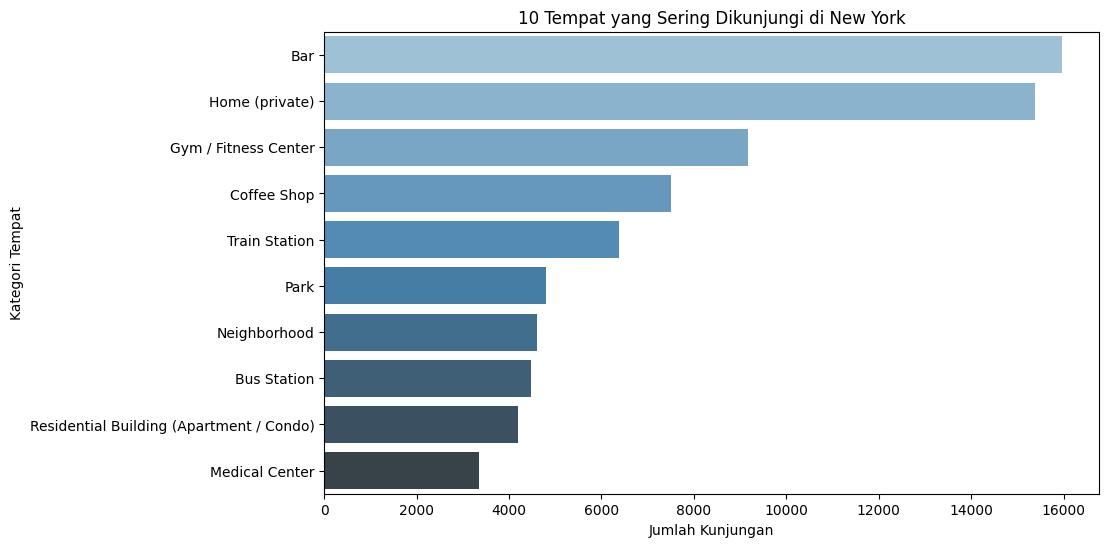

<ipython-input-12-847bc345fc08>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tky_places.values, y=top_tky_places.index, palette='Reds_d')


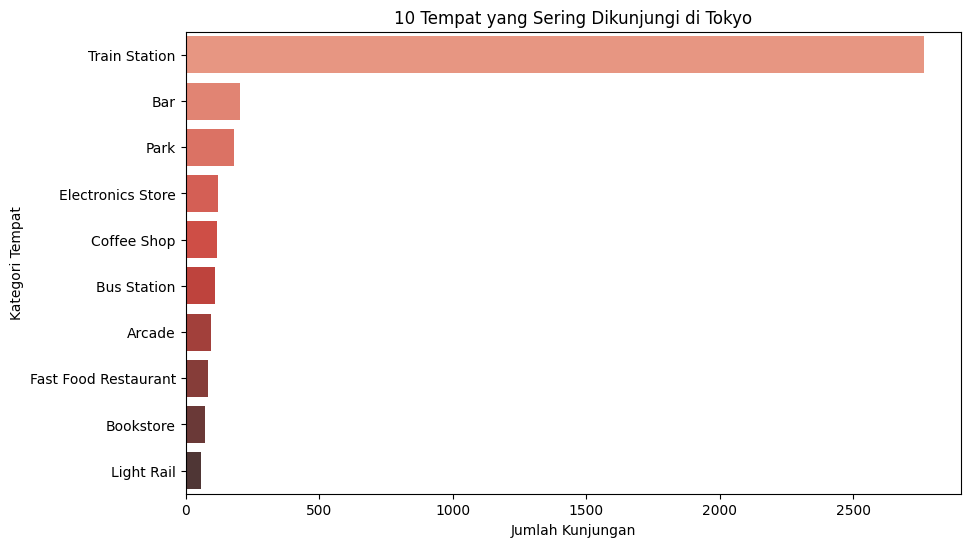

In [12]:
# 1. melihat seberapa sering tempat yang di kunjungi dari kedua kota menggunakan data set asli
# Menghitung tempat yang sering dikunjungi di NYC
top_nyc_places = nyc_filtered['venueCategory'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_nyc_places.values, y=top_nyc_places.index, palette='Blues_d')
plt.title('10 Tempat yang Sering Dikunjungi di New York')
plt.xlabel('Jumlah Kunjungan')
plt.ylabel('Kategori Tempat')
plt.show()
# Menghitung tempat yang sering dikunjungi di Tokyo
top_tky_places = tky_filtered['venueCategory'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tky_places.values, y=top_tky_places.index, palette='Reds_d')
plt.title('10 Tempat yang Sering Dikunjungi di Tokyo')
plt.xlabel('Jumlah Kunjungan')
plt.ylabel('Kategori Tempat')
plt.show()

<ipython-input-13-72504a47e483>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


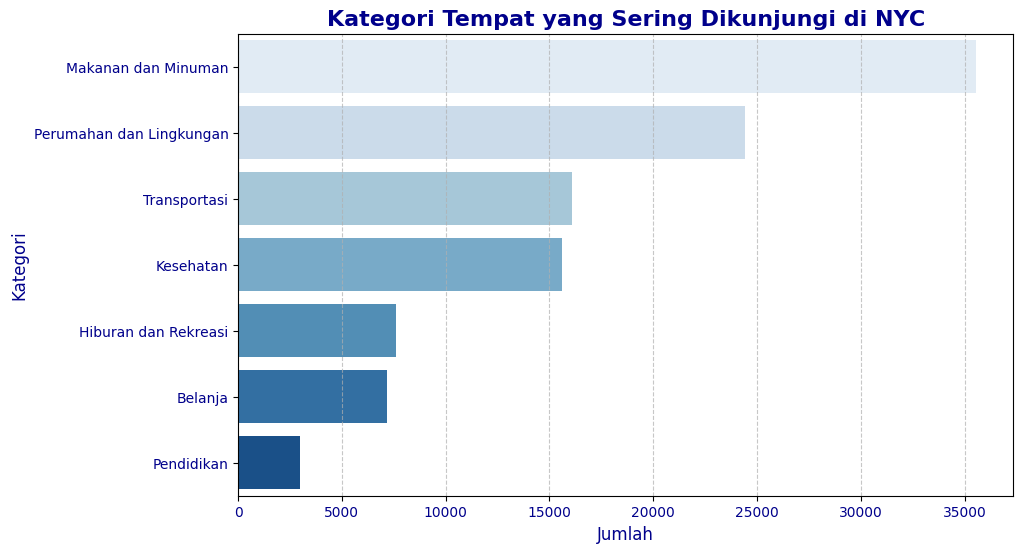

<ipython-input-13-72504a47e483>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


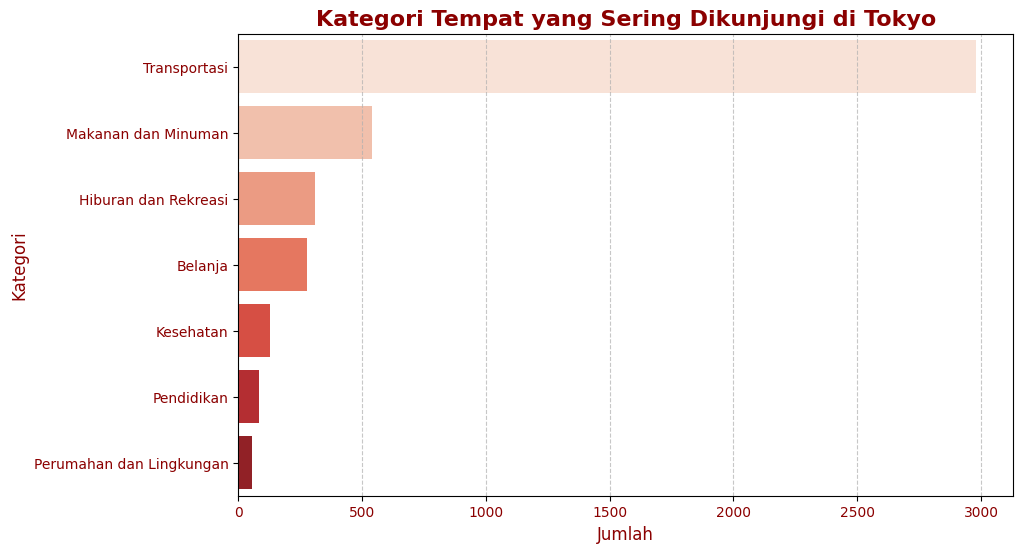

In [13]:
# Untuk NYC
plt.figure(figsize=(10, 6))
sns.countplot(
    y='Kategori',
    data=nyc_filtered,
    order=nyc_filtered['Kategori'].value_counts().index,
    palette=sns.color_palette("Blues", len(nyc_filtered['Kategori'].unique())) # Warna biru untuk NYC
)
plt.title('Kategori Tempat yang Sering Dikunjungi di NYC', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Jumlah', fontsize=12, color='darkblue')
plt.ylabel('Kategori', fontsize=12, color='darkblue')
plt.xticks(fontsize=10, color='darkblue')
plt.yticks(fontsize=10, color='darkblue')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Untuk Tokyo
plt.figure(figsize=(10, 6))
sns.countplot(
    y='Kategori',
    data=tky_filtered,
    order=tky_filtered['Kategori'].value_counts().index,
    palette=sns.color_palette("Reds", len(tky_filtered['Kategori'].unique())) # Warna merah untuk Tokyo
)
plt.title('Kategori Tempat yang Sering Dikunjungi di Tokyo', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Jumlah', fontsize=12, color='darkred')
plt.ylabel('Kategori', fontsize=12, color='darkred')
plt.xticks(fontsize=10, color='darkred')
plt.yticks(fontsize=10, color='darkred')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-14-df86a519f15b>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nyc_filtered['utcTimestamp'] = pd.to_datetime(nyc_filtered['utcTimestamp'])
<ipython-input-14-df86a519f15b>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tky_filtered['utcTimestamp'] = pd.to_datetime(tky_filtered['utcTimestamp'])
<ipython-input-14-df86a519f15b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nyc_hourly.index, y=nyc_hourly.values, palette='Blues_d')


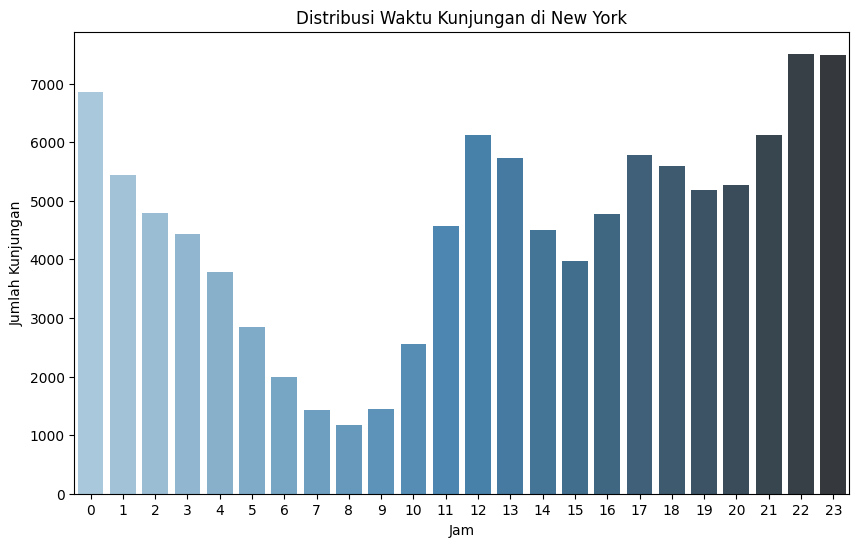

<ipython-input-14-df86a519f15b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tky_hourly.index, y=tky_hourly.values, palette='Reds_d')


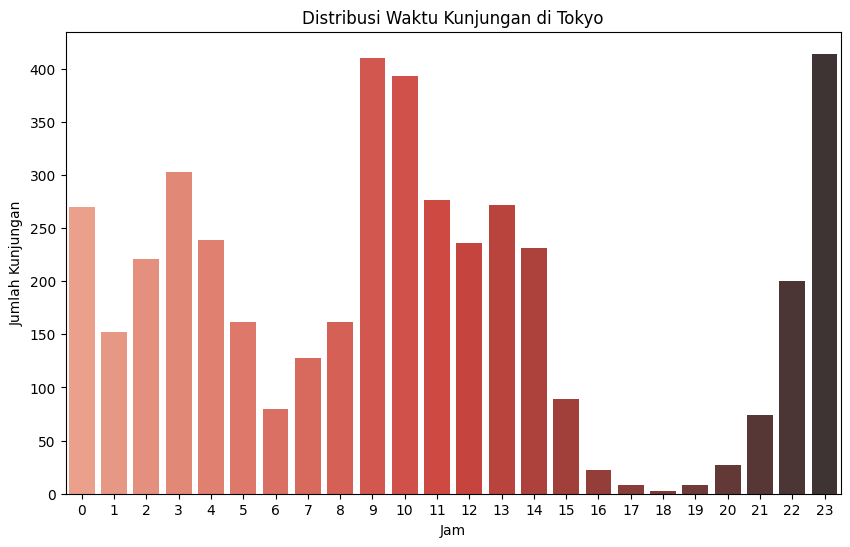

In [14]:
# 3.visualisasi untuk melihat analisis kunjungan tertinggi di kedua kota berdasarkan pola waktunya
#  Tambahkan kolom jam (hour) dari waktu kunjungan (utcTimestamp)
# Pastikan kolom 'utcTimestamp' dalam format datetime
nyc_filtered['utcTimestamp'] = pd.to_datetime(nyc_filtered['utcTimestamp'])
tky_filtered['utcTimestamp'] = pd.to_datetime(tky_filtered['utcTimestamp'])

# Tambahkan kolom jam
nyc_filtered['hour'] = nyc_filtered['utcTimestamp'].dt.hour
tky_filtered['hour'] = tky_filtered['utcTimestamp'].dt.hour

# 9. Analisis jam kunjungan di NYC
nyc_hourly = nyc_filtered['hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=nyc_hourly.index, y=nyc_hourly.values, palette='Blues_d')
plt.title('Distribusi Waktu Kunjungan di New York')
plt.xlabel('Jam')
plt.ylabel('Jumlah Kunjungan')
plt.xticks(range(24))
plt.show()

# 10. Analisis jam kunjungan di Tokyo
tky_hourly = tky_filtered['hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=tky_hourly.index, y=tky_hourly.values, palette='Reds_d')
plt.title('Distribusi Waktu Kunjungan di Tokyo')
plt.xlabel('Jam')
plt.ylabel('Jumlah Kunjungan')
plt.xticks(range(24))
plt.show()


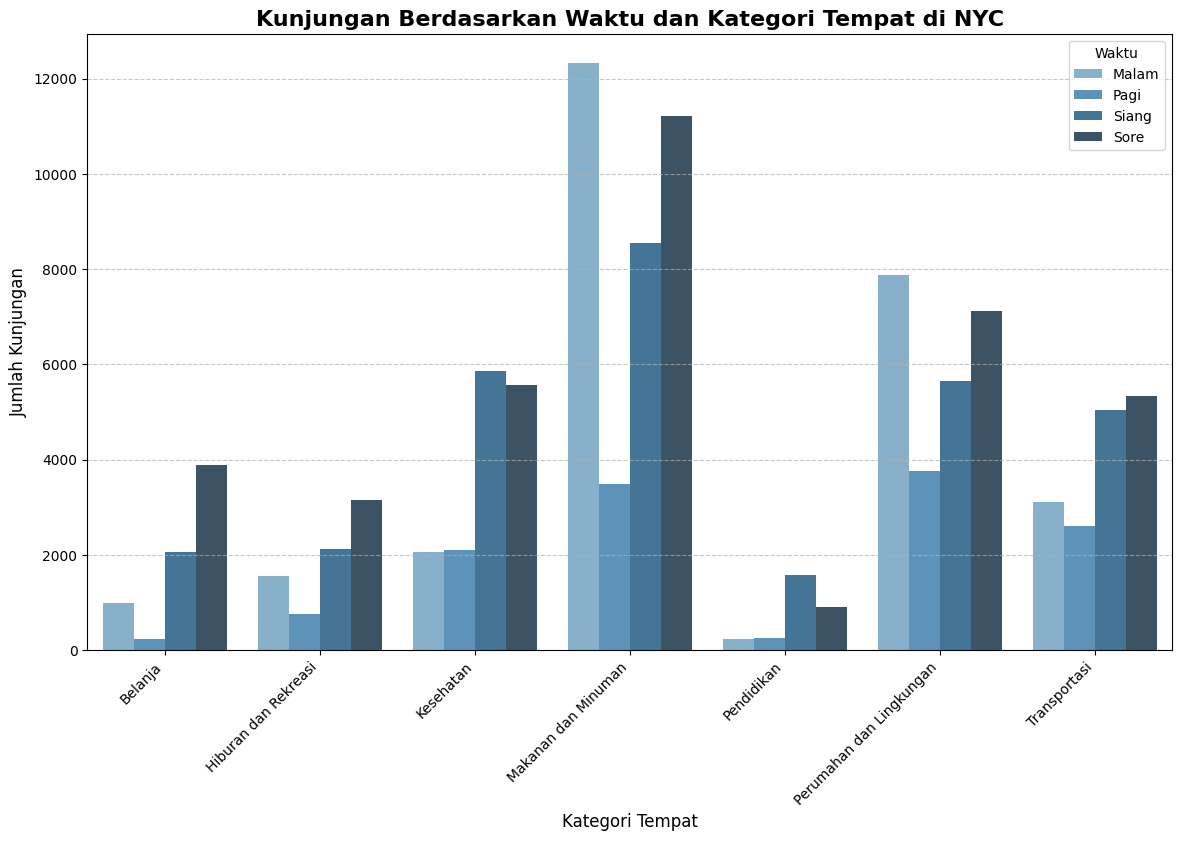

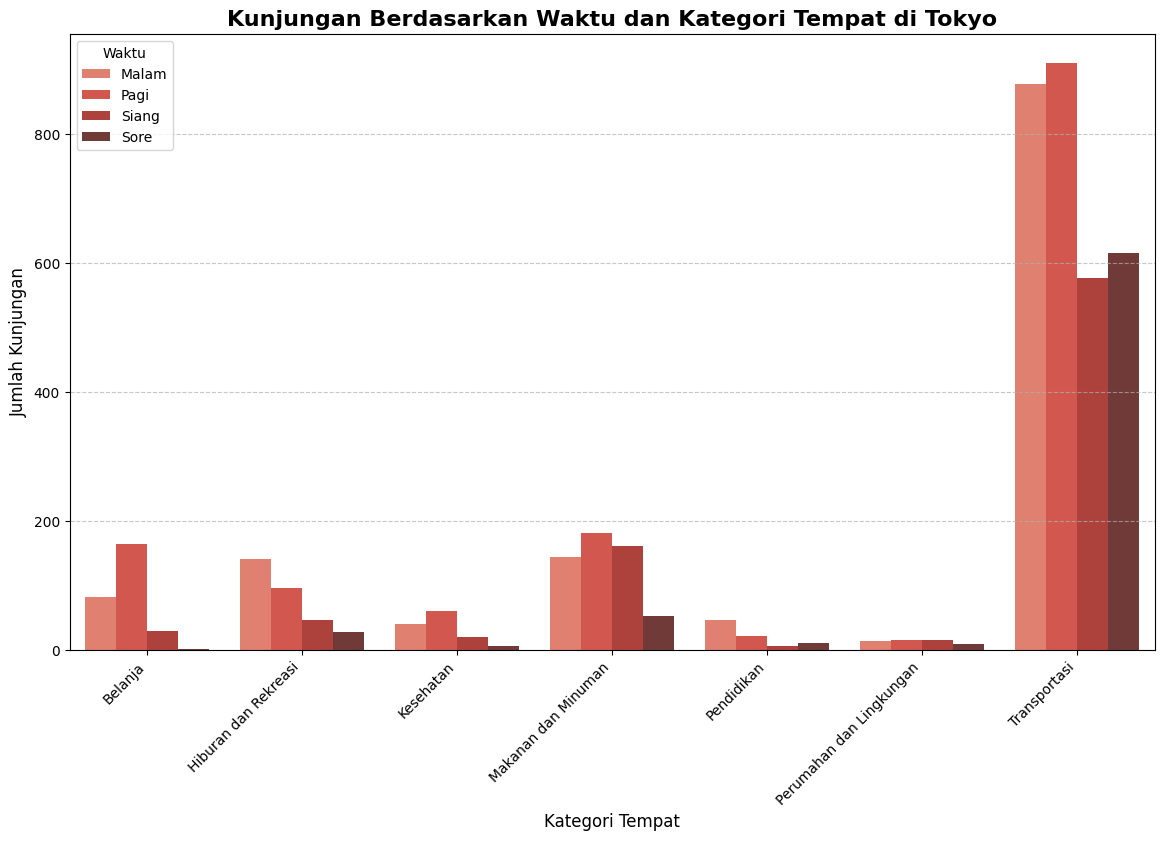

In [15]:
# visualisasi check-in berdasarkan kategori dan waktu di tokyo dan newyork
# Definisikan fungsi untuk mengelompokkan waktu
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    elif 18 <= hour < 24:
        return 'Sore'
    else:
        return 'Malam'

# Tambahkan kolom kategori waktu
nyc_filtered['Waktu'] = nyc_filtered['hour'].apply(categorize_time)
tky_filtered['Waktu'] = tky_filtered['hour'].apply(categorize_time)

# Kelompokkan data berdasarkan kategori waktu dan tempat
nyc_time_category = nyc_filtered.groupby(['Waktu', 'Kategori']).size().reset_index(name='Jumlah')
tky_time_category = tky_filtered.groupby(['Waktu', 'Kategori']).size().reset_index(name='Jumlah')


# Visualisasi NYC (Barplot Vertikal)
plt.figure(figsize=(14, 8))
sns.barplot(
    data=nyc_time_category,
    x='Kategori',
    y='Jumlah',
    hue='Waktu',
    palette='Blues_d'
)
plt.title('Kunjungan Berdasarkan Waktu dan Kategori Tempat di NYC', fontsize=16, fontweight='bold')
plt.xlabel('Kategori Tempat', fontsize=12)
plt.ylabel('Jumlah Kunjungan', fontsize=12)
plt.legend(title='Waktu', fontsize=10)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Memiringkan label kategori agar terbaca
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualisasi Tokyo (Barplot Vertikal)
plt.figure(figsize=(14, 8))
sns.barplot(
    data=tky_time_category,
    x='Kategori',
    y='Jumlah',
    hue='Waktu',
    palette='Reds_d'
)
plt.title('Kunjungan Berdasarkan Waktu dan Kategori Tempat di Tokyo', fontsize=16, fontweight='bold')
plt.xlabel('Kategori Tempat', fontsize=12)
plt.ylabel('Jumlah Kunjungan', fontsize=12)
plt.legend(title='Waktu', fontsize=10)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Memiringkan label kategori agar terbaca
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
